<h1><center>253 HW3</center></h1>
<h1><center>Grace Yang (gy654)</center></h1>

1. solve the Thomson problem for several choices of N where $3 \leq N \leq 14$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import pairwise_distances
from numpy.linalg import norm



In [2]:
# define a function that generates N points around the sphere
def generate_electrons(N):
    X = np.random.randn(N, 3)
    X /= np.sqrt(np.sum(X**2, axis =1)).reshape(-1, 1)
    return X

# plot the distribution of N points on the unit sphere
def see_distribution(X):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(X[:, 0], X[:,1], X[:, 2])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

# define a function that calculates the euclidean distance between two points
def distance_ij(pointi, pointj):
        return pairwise_distances(np.array([pointi, pointj]), metric ='euclidean')[0][1]


In [3]:
# define a function that calculates the cost function U_E that we want to minimize.
def U_E(X):
    sum = 0
    for i in range(len(X)):
        point_i = X[i]
        for j in range(len(X)):
            if j != i:
                point_j = X[j]
                sum += 1/distance_ij(point_i, point_j)
    return 0.5 * sum

$$\frac{\partial U}{\partial x_i} = -\sum_{i \neq j }^{N}\frac{(x_i-x_j)}{r_{i, j}^3}$$
$$\frac{\partial U}{\partial y_i} = -\sum_{i \neq j }^{N}\frac{(y_i-y_j)}{r_{i, j}^3}$$
$$\frac{\partial U}{\partial z_i} = -\sum_{i \neq j }^{N}\frac{(z_i-z_j)}{r_{i, j}^3}$$

In [4]:
# define a function that computes the jacobian of U with respect to N points x1, x2, x3, ...x_n on the sphere 
def Jacobian_U(points):
    # find partial dericative wrt point i
    def find_partial(points, i):
        point_i = points[i, :]
        xi, yi, zi = point_i
        sum_x, sum_y, sum_z = 0, 0, 0
        x, y, z = points[:, 0], points[:, 1], points[:, 2]
        for j in range(len(points)):
            point_j = points[j, :]
            r_ij_cube = (distance_ij(point_i, point_j))**3
            if r_ij_cube != 0:
                sum_x += -(xi-x[j])/r_ij_cube
                sum_y += -(yi-y[j])/r_ij_cube
                sum_z += -(zi-z[j])/r_ij_cube
        partials = [sum_x, sum_y, sum_z]
        return partials
        # should return 3 * 1 array


    J = np.zeros((len(points), 3))
    for i in range(len(points)):
        J[i, :] = find_partial(points, i)
    return J



In [5]:
# define a function that projects any point onto the unit sphere
def project(points):
    ret = np.array([np.divide(point, norm(point)) for point in points])
    return ret

projected gradient descent:
$$x_{t+1} = P_{C} (x_t - \alpha \beta^{n} \nabla f(x_t))$$

In [6]:
# define a function that implements projected gradient descent
def pgd(X_initial):
    X = X_initial
    maxIter = 100
    U_cost=[U_E(X)]
    i = 0
    while (i==0 or abs(U_cost[-1]-U_cost[-2])>1e-8) and i<maxIter:
        # start line search!
        beta_power = 1
        while True:
            beta = 0.9
            new_X = X - (beta)**(beta_power) * Jacobian_U(X)
            new_U = U_E(new_X)
            if new_U < U_cost[-1]:
                X = project(new_X)
                U_cost.append(U_E(X))
                break
            beta_power +=1
        i +=1 
    return U_cost, X


N = 3
N = 4
N = 5
N = 6
N = 7
N = 8
N = 9
N = 10
N = 11
N = 12
N = 13


[1.73205081126837,
 3.674234617881453,
 6.474691531315252,
 9.98528138602738,
 14.453074824150727,
 19.67529036593433,
 25.760128933157603,
 32.71712402178275,
 40.59739773586562,
 49.16525307625197,
 59.15232993217215]

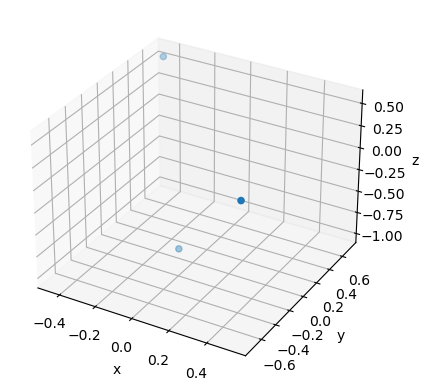

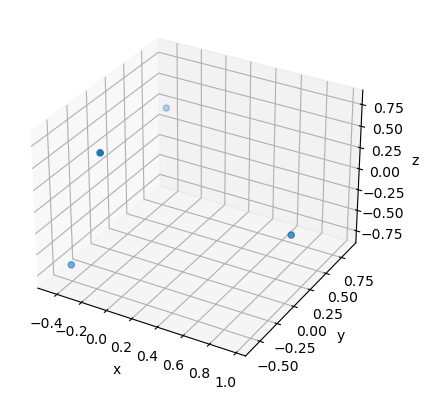

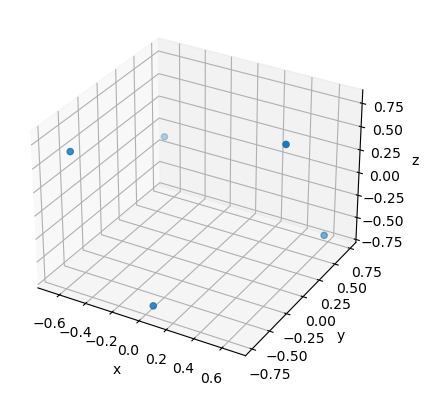

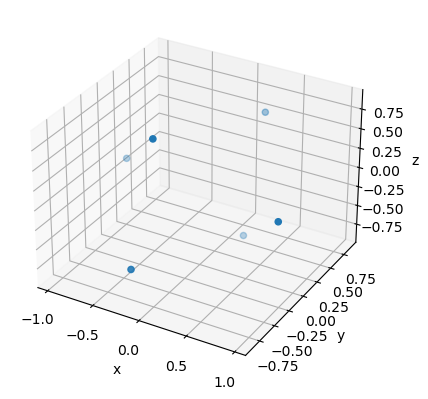

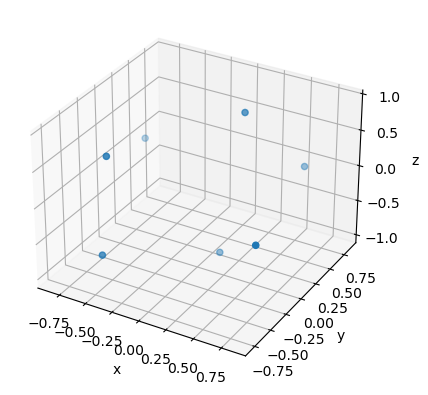

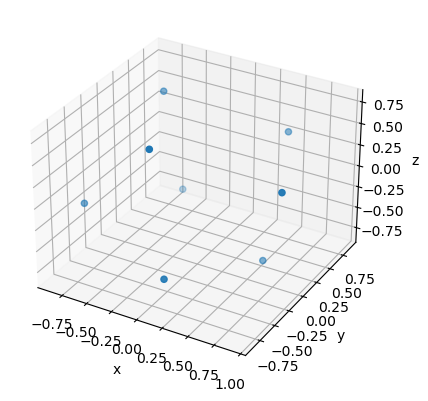

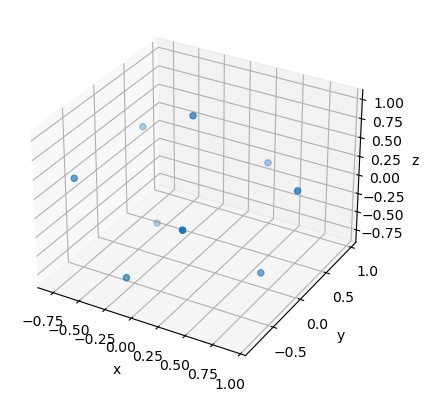

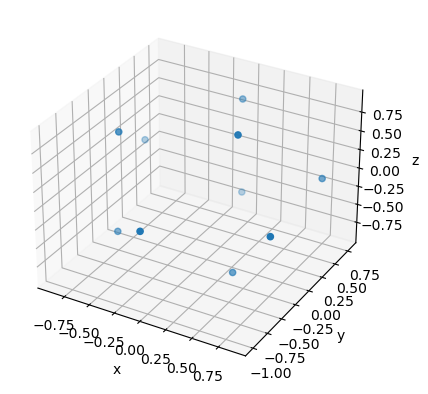

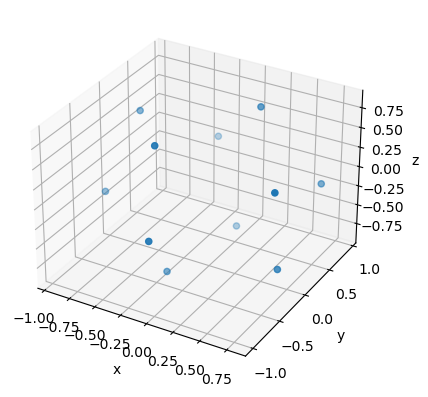

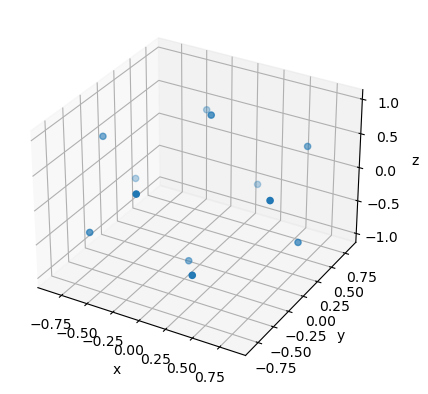

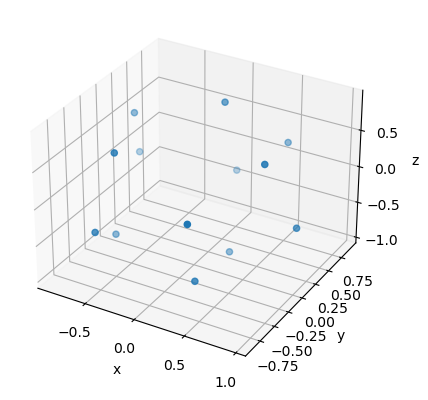

In [7]:
N_list = range(3, 14)
def Thomson(N_list):
    X_list = []
    U_costlist = []
    for N in N_list:
        X = generate_electrons(N)
        U_cost, X = pgd(X)
        X_list.append(X)
        print(f'N = {N}')
        U_costlist.append(U_cost[-1])
        see_distribution(X)
    return X_list, U_costlist
X_list, U_costlist = Thomson(N_list)
U_costlist


It is verified that U converges to the minimum E value on wikipedia for each N. The symmetry configurations are verified.

2. $$ U_{approx}(N) = \frac{N^2}{2}(1-aN^{-1/2}+bN^{-3/2}), a = 1.010461, b = 0.137$$

In [10]:


# define a function that find numerous local minimum given num_initializations different initializations. 
def numerous_local_min(N, num_initializations):
    initializations = [generate_electrons(N) for i in range(num_initializations)]
    U_cost_values = []
    for init in initializations:
        X = init
        U_cost, X = pgd(X)
        X_list.append(X)
        if U_cost[-1] not in U_cost_values:
            U_cost_values.append(U_cost[-1]) 
        print(f'N = {N}')
        print(f'minimum U:{U_cost[-1]}')
    return U_cost_values

# solve the Thomson problem for a few choices of N greater than N= 14
N_list = [ 16, 17, 19]
res = {}
for N in N_list:
    U_cost_values = numerous_local_min(N, 7)
    res[f'{N}'] = U_cost_values
    print(f'for N = {N}, minimum of U are:{U_cost_values}')



N = 16
minimum U:92.9136407659426
N = 16
minimum U:97.9241990558208
N = 16
minimum U:108.53472444780343
N = 16
minimum U:103.76578998901944
N = 16
minimum U:100.81139679239382
N = 16
minimum U:98.35907260614304
N = 16
minimum U:92.92141234311985
for N = 16, minimum of U are:[92.9136407659426, 97.9241990558208, 108.53472444780343, 103.76578998901944, 100.81139679239382, 98.35907260614304, 92.92141234311985]
N = 17
minimum U:120.7159416710694
N = 17
minimum U:128.5349463495378
N = 17
minimum U:117.57139587468816
N = 17
minimum U:112.58625399098054
N = 17
minimum U:106.1563228819561
N = 17
minimum U:134.20502402106348
N = 17
minimum U:173.12977271426382
for N = 17, minimum of U are:[120.7159416710694, 128.5349463495378, 117.57139587468816, 112.58625399098054, 106.1563228819561, 134.20502402106348, 173.12977271426382]
N = 19
minimum U:146.94629439939445
N = 19
minimum U:160.50506038184764
N = 19
minimum U:164.21336162871802
N = 19
minimum U:142.79923162096765
N = 19
minimum U:154.754104518

Therefore, when N>14, the Thompson problem is nmonconvex and has numerous local minima. We get different minimizing values with different initializations.

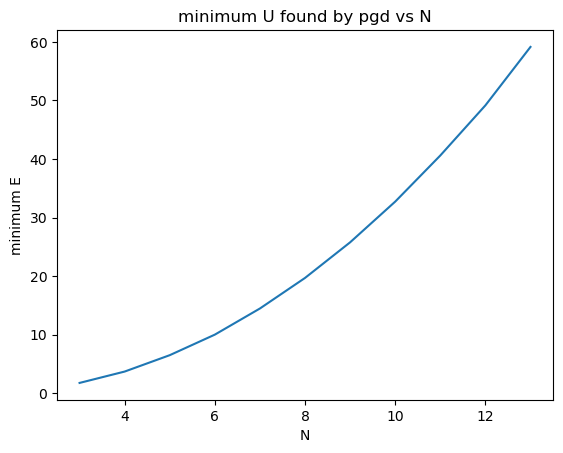

In [9]:
# make a plot where horizontal axis is N and the vertical axis is U
def plot_pgd_results():
    plt.plot(range(3, 14), U_costlist)
    plt.title('minimum U found by pgd vs N')
    plt.xlabel('N')
    plt.ylabel('minimum E')
plot_pgd_results()

Text(0, 0.5, 'minimum E')

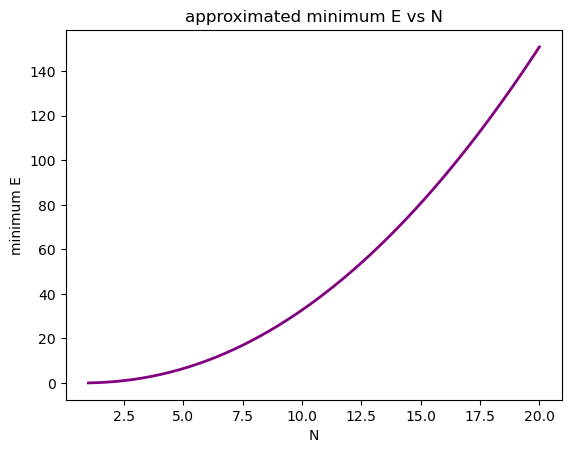

In [16]:
# plot U_{approx} using the formula above

def U_approx(N):
    a = 1.10461
    b = 0.137
    return (N**2/2) * (1- a * N**(-0.5) + b * N**(-1.5))
N = np.linspace(1, 20, 200)
plt.plot(N, U_approx(N), color = 'purple', linewidth=2)
plt.title('approximated minimum E vs N')
plt.xlabel('N')
plt.ylabel('minimum E')


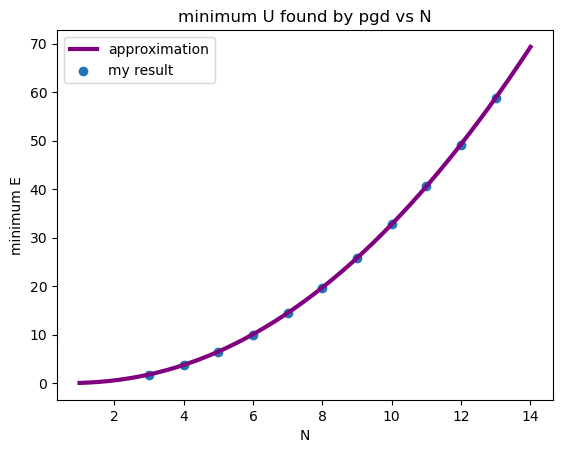

In [17]:
# make a scatter plot of my results for comparison

N = np.linspace(1, 14, 140)
plt.plot(N, U_approx(N), linewidth=3, color = 'purple', label = 'approximation')
plt.title('approximated minimum E vs N')
plt.scatter(range(3, 14), U_costlist, label = 'my result')
plt.title('minimum U found by pgd vs N')
plt.xlabel('N')
plt.ylabel('minimum E')
plt.legend()

Note that when N>14, the minimum E we get from pgd may vary depend on initialization.

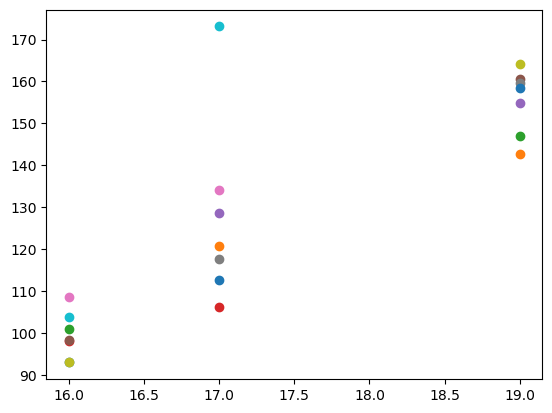

In [12]:
for i in range(7):
    for n in [16, 17, 19]:
        plt.scatter(n, res[f'{n}'][i])